<img src="images/LOGO_2.jpeg" width="450" height='450'/>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [17]:
df = pd.read_csv('/root/Desktop/churn.csv' , parse_dates=['last_trip_date','signup_date'])

In [18]:
df.head()   # gives by default the top five rows of the data

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


In [19]:
df.tail()    #gives bottom five rows of the data

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct
49995,5.63,4.2,5.0,1.0,King's Landing,2014-06-05,iPhone,2014-01-25,0.0,0,False,100.0
49996,0.00,4.0,NaN,1.0,Astapor,2014-01-25,iPhone,2014-01-24,0.0,1,False,0.0
49997,3.86,5.0,5.0,1.0,Winterfell,2014-05-22,Android,2014-01-31,0.0,0,True,100.0
49998,4.58,3.5,3.0,1.0,Astapor,2014-01-15,iPhone,2014-01-14,0.0,2,False,100.0
49999,3.49,5.0,NaN,1.0,Astapor,2014-04-20,Android,2014-01-18,0.0,0,False,0.0


In [20]:
df.shape   #define the size of the data i.e (no. of rows * no. of columns)

(50000, 12)

In [21]:
df.describe()   # To analyze the numeric column in the data

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct
count,50000.000000,49799.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,5.796827,4.778158,4.601559,1.074764,8.849536,2.278200,60.926084
std,5.707357,0.446652,0.617338,0.222336,19.958811,3.792684,37.081503
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2.420000,4.700000,4.300000,1.000000,0.000000,0.000000,33.300000
50%,3.880000,5.000000,4.900000,1.000000,0.000000,1.000000,66.700000
75%,6.940000,5.000000,5.000000,1.050000,8.600000,3.000000,100.000000
max,160.960000,5.000000,5.000000,8.000000,100.000000,125.000000,100.000000


In [22]:
df.isnull().sum()   # checking if there is any empty or missing values in the data

avg_dist                     0
avg_rating_by_driver       201
avg_rating_of_driver      8122
avg_surge                    0
city                         0
last_trip_date               0
phone                      396
signup_date                  0
surge_pct                    0
trips_in_first_30_days       0
luxury_car_user              0
weekday_pct                  0
dtype: int64

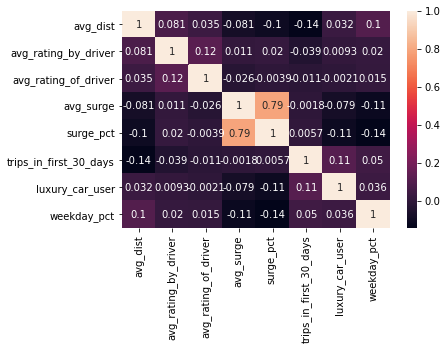

In [23]:
sns.heatmap(df.corr() , annot=True)
plt.show()

In [26]:
import datetime
cutoff = df.last_trip_date.max() - datetime.timedelta(30,0,0)

In [24]:
df.last_trip_date.max()

Timestamp('2014-07-01 00:00:00')

In [25]:
df.last_trip_date.min()

Timestamp('2014-01-01 00:00:00')

In [27]:
cutoff

Timestamp('2014-06-01 00:00:00')

In [28]:
df['churn'] = df.last_trip_date.map(lambda d: 1 if d > cutoff else 0)

In [29]:
df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,churn
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,1
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0,0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0,1
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4,0


In [31]:
cat_cols = list(df.select_dtypes('object').columns)
cat_cols

['city', 'phone']

In [32]:
num_cols = list(df.select_dtypes('float64').columns)
num_cols

['avg_dist',
 'avg_rating_by_driver',
 'avg_rating_of_driver',
 'avg_surge',
 'surge_pct',
 'weekday_pct']

In [33]:
num_cols.append('trips_in_first_30_days')
num_cols

['avg_dist',
 'avg_rating_by_driver',
 'avg_rating_of_driver',
 'avg_surge',
 'surge_pct',
 'weekday_pct',
 'trips_in_first_30_days']

### Pipeline Creation for categorical columns & numerical columns

In [34]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

In [35]:
cat_pipeline = make_pipeline(SimpleImputer(strategy='constant', fill_value='missing'),
                            OneHotEncoder())

In [37]:
cat_data_tf = cat_pipeline.fit_transform(df[cat_cols]).toarray()

In [38]:
num_pipeline = make_pipeline(SimpleImputer(strategy='median'),
                             MinMaxScaler())                            

In [39]:
num_data_tf = num_pipeline.fit_transform(df[num_cols])

In [42]:
import numpy as np
feature_data = np.hstack([cat_data_tf, num_data_tf, df.luxury_car_user.values.reshape(-1,1)])

In [43]:
feature_data.shape

(50000, 14)

In [44]:
target_data = df.churn

## Model Selection

# 1.) Random Forest Classifier

In [45]:
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [46]:
final_pipeline = make_pipeline(SelectKBest(k=8), RandomForestClassifier(n_estimators=20))

In [47]:
trainX, testX, trainY, testY = train_test_split(feature_data,target_data)

In [48]:
final_pipeline.fit(trainX,trainY)

Pipeline(steps=[('selectkbest', SelectKBest(k=8)),
                ('randomforestclassifier',
                 RandomForestClassifier(n_estimators=20))])

In [49]:
final_pipeline.score(testX,testY)

0.66672

# 2.) Grid Search (SVM)

In [50]:
from sklearn.model_selection import GridSearchCV

In [51]:
params = {
    'selectkbest__k':[5,8,12],
    'randomforestclassifier__n_estimators':[10,30,50]
}

In [52]:
grid_model = GridSearchCV(final_pipeline,param_grid=params, cv=5, n_jobs=-1)

In [53]:
grid_model.fit(trainX,trainY)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('selectkbest', SelectKBest(k=8)),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(n_estimators=20))]),
             n_jobs=-1,
             param_grid={'randomforestclassifier__n_estimators': [10, 30, 50],
                         'selectkbest__k': [5, 8, 12]})

In [54]:
grid_model.best_params_

{'randomforestclassifier__n_estimators': 30, 'selectkbest__k': 12}

In [55]:
grid_model.best_score_

0.7605333333333333

In [56]:
grid_model.score(testX,testY)

0.75736

### Using column transformer

In [57]:
from sklearn.compose import ColumnTransformer

In [58]:
num_cols

['avg_dist',
 'avg_rating_by_driver',
 'avg_rating_of_driver',
 'avg_surge',
 'surge_pct',
 'weekday_pct',
 'trips_in_first_30_days']

In [59]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_pipeline, num_cols),
        ('cat', cat_pipeline, cat_cols)])

In [60]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline(steps=[('preprocessor',preprocessor),
                           ('selectkbest', SelectKBest(k=8)),
                           ('classifier',RandomForestClassifier(n_estimators=20))])

### The above code can also be written as below

#pipeline = make_pipeline(preprocessor, SelectKBest(k=8), RandomForestClassifier(n_estimators=20))

In [61]:
num_pipeline

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('minmaxscaler', MinMaxScaler())])

In [62]:
params = {
    'preprocessor__num__simpleimputer__strategy':['mean','median'],
    'selectkbest__k':[12,13],
    'classifier__n_estimators':[50,70]
}

In [63]:
grid_model = GridSearchCV(pipeline, param_grid=params,cv=5, n_jobs=-1)

In [64]:
feature_data = df.drop('churn',axis=1)
target_data = df.churn
trainX, testX, trainY, testY = train_test_split(feature_data,target_data)

In [65]:
grid_model.fit(trainX,trainY)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('minmaxscaler',
                                                                                          MinMaxScaler())]),
                                                                         ['avg_dist',
                                                                          'avg_rating_by_driver',
                                                                          'avg_rating_of_driver',
                                                                          'avg_surge',
                             

In [66]:
grid_model.best_score_

0.7537866666666666

In [67]:
grid_model.best_params_

{'classifier__n_estimators': 50,
 'preprocessor__num__simpleimputer__strategy': 'median',
 'selectkbest__k': 13}

# GOOD LUCK

**About the Author**

<p>Hi! It's <a href="https://www.intellicial.in/">Intellicial Team</a> the author of this notebook. I hope you found this Notebook easy to learn!</p>

<p>Copyright © . <a href="https://www.intellicial.in/">Intellicial Innovations</a> .</p>